# Codeforces User Performance Analysis

In this project, we will analyze the data of Codeforces users to identify patterns and factors that influence user performance. By understanding these factors, we aim to uncover insights that will help users improve their performance on the platform.

We will examine key data points such as:
- Problem tags
- Submission verdicts
- Problem indices
- User success rates

let's start the analysis!



## Data Collection

We will use the Codeforces API to collect data about the user's submissions and problem data
https://codeforces.com/apiHelp
.


In [7]:
# Importing necessary libraries
import requests
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter

# Define user handle and the number of submissions to fetch
handle = "khaled40"  # The Codeforces user handle
count = 2000           # The number of submissions to retrieve

# Construct the API URL
url = f"https://codeforces.com/api/user.status?handle={handle}&from=1&count={count}"

# Send GET request to fetch user submission data
response = requests.get(url)

# Check if the request was successful (HTTP status code 200)
if response.status_code != 200:
    print("Failed to fetch data from Codeforces API.")
    exit()  # Exit the script if the API request fails

# Extract data from the response JSON
data = response.json().get("result", [])

# Check if any data was returned
if not data:
    print("No data found for the user.")
    exit()  # Exit if no data is found

print(data)    


[{'id': 331846927, 'contestId': 2130, 'creationTimeSeconds': 1753981948, 'relativeTimeSeconds': 9448, 'problem': {'contestId': 2130, 'index': 'B', 'name': 'Pathless', 'type': 'PROGRAMMING', 'points': 1000.0, 'rating': 1100, 'tags': ['constructive algorithms']}, 'author': {'contestId': 2130, 'participantId': 215991658, 'members': [{'handle': 'khaled40'}], 'participantType': 'OUT_OF_COMPETITION', 'ghost': False, 'room': 604, 'startTimeSeconds': 1753972500}, 'programmingLanguage': 'C++23 (GCC 14-64, msys2)', 'verdict': 'SKIPPED', 'testset': 'TESTS', 'passedTestCount': 7, 'timeConsumedMillis': 93, 'memoryConsumedBytes': 0}, {'id': 331810690, 'contestId': 2130, 'creationTimeSeconds': 1753977004, 'relativeTimeSeconds': 4504, 'problem': {'contestId': 2130, 'index': 'A', 'name': 'Submission is All You Need', 'type': 'PROGRAMMING', 'points': 500.0, 'rating': 800, 'tags': ['greedy', 'math']}, 'author': {'contestId': 2130, 'participantId': 215991658, 'members': [{'handle': 'khaled40'}], 'particip

In [8]:

# Define the CSV header
header = [
    "Submission ID", "Contest ID", "Problem Index", "Problem Name", 
    "Problem Tags", "Programming Language", "Verdict", 
    "Time Consumed (ms)", "Memory Consumed (bytes)", "Points"
]

# Write data to a CSV file
filename = "user_submissions.csv"
with open(filename, mode="w", newline='', encoding="utf-8") as file:
    writer = csv.writer(file)
    writer.writerow(header)  # Write the header row
    
    # Write each submission's details
    for submission in data:
        row = [
            submission.get("id"),
            submission.get("contestId"),
            submission.get("problem", {}).get("index"),
            submission.get("problem", {}).get("name"),
            ", ".join(submission.get("problem", {}).get("tags", [])),  # Join tags with commas
            submission.get("programmingLanguage"),
            submission.get("verdict"),
            submission.get("timeConsumedMillis"),
            submission.get("memoryConsumedBytes"),
            submission.get("points", "N/A"),  # Default to "N/A" if points is missing
        ]
        writer.writerow(row)

print(f"Data saved to {filename}")

# Load the saved CSV into a pandas DataFrame for further analysis
df = pd.read_csv(filename)

# Print the first few rows of the DataFrame for verification
print(df.head())


Data saved to user_submissions.csv
   Submission ID  Contest ID Problem Index  \
0      331846927        2130             B   
1      331810690        2130             A   
2      328240135      100814             G   
3      328122505          20             C   
4      327599732        1364             B   

                          Problem Name             Problem Tags  \
0                             Pathless  constructive algorithms   
1           Submission is All You Need             greedy, math   
2               It is all about wisdom                      NaN   
3                            Dijkstra?   graphs, shortest paths   
4  Most socially-distanced subsequence     greedy, two pointers   

       Programming Language  Verdict  Time Consumed (ms)  \
0  C++23 (GCC 14-64, msys2)  SKIPPED                  93   
1  C++23 (GCC 14-64, msys2)  SKIPPED                  62   
2  C++23 (GCC 14-64, msys2)       OK                5467   
3  C++23 (GCC 14-64, msys2)       OK         


## Data Cleaning Phase


### 1. Remove Null Values
We will start by removing any rows with null or missing values, as they can lead to inaccurate analysis and affect the reliability of our results.

In [9]:
# Count null values in each column
print("Null values in each column:")
print(df.isnull().sum())

Null values in each column:
Submission ID                0
Contest ID                   0
Problem Index                0
Problem Name                 0
Problem Tags                 2
Programming Language         0
Verdict                      0
Time Consumed (ms)           0
Memory Consumed (bytes)      0
Points                     593
dtype: int64


### 2. Remove Duplicates
Although there are no duplicates in our data, it's always a good practice to check for and remove any duplicate entries to ensure data consistency.

In [10]:
import pandas as pd

# Count the number of duplicate rows
duplicates = df.duplicated().sum()

print(f"Number of duplicate rows: {duplicates}")


Number of duplicate rows: 0



### 3. Handle Outliers
Outliers are values that are significantly different from the majority of the data. While outliers can sometimes provide useful insights, they can also skew results if not handled properly.


### 4- Drop unnecessary columns 
Unnecessary or irrelevant columns are removed to simplify the dataset and make it more manageable for analysis or modeling.

In [11]:
df.columns

Index(['Submission ID', 'Contest ID', 'Problem Index', 'Problem Name',
       'Problem Tags', 'Programming Language', 'Verdict', 'Time Consumed (ms)',
       'Memory Consumed (bytes)', 'Points'],
      dtype='object')

In [12]:
# Drop specific columns
columns_to_drop = ["Contest ID", "Points","Contest ID","Problem Name","Submission ID"]
df_1 = df.drop(columns=columns_to_drop)

# Preview the DataFrame after dropping
print("DataFrame after dropping columns:")
print(df_1.head())

DataFrame after dropping columns:
  Problem Index             Problem Tags      Programming Language  Verdict  \
0             B  constructive algorithms  C++23 (GCC 14-64, msys2)  SKIPPED   
1             A             greedy, math  C++23 (GCC 14-64, msys2)  SKIPPED   
2             G                      NaN  C++23 (GCC 14-64, msys2)       OK   
3             C   graphs, shortest paths  C++23 (GCC 14-64, msys2)       OK   
4             B     greedy, two pointers  C++23 (GCC 14-64, msys2)       OK   

   Time Consumed (ms)  Memory Consumed (bytes)  
0                  93                        0  
1                  62                        0  
2                5467                  7680000  
3                 108                  4608000  
4                  78                   102400  


In [13]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593 entries, 0 to 592
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Problem Index            593 non-null    object
 1   Problem Tags             591 non-null    object
 2   Programming Language     593 non-null    object
 3   Verdict                  593 non-null    object
 4   Time Consumed (ms)       593 non-null    int64 
 5   Memory Consumed (bytes)  593 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 27.9+ KB


### 5. Fix Invalid and Inconsistent Values
Finally, we will address any invalid or inconsistent values in the dataset. This includes correcting values that do not adhere to expected formats or criteria (e.g., invalid verdicts or programming languages) to maintain data integrity.

In [14]:
df_1['Problem Index'].unique()



array(['B', 'A', 'G', 'C', 'D', 'H', 'E', 'F', 'B2', 'B1', 'A1', 'G2',
       'G1', 'C1'], dtype=object)

In [15]:
df_1['Verdict'].unique()


array(['SKIPPED', 'OK', 'WRONG_ANSWER', 'COMPILATION_ERROR',
       'TIME_LIMIT_EXCEEDED', 'MEMORY_LIMIT_EXCEEDED', 'RUNTIME_ERROR',
       'IDLENESS_LIMIT_EXCEEDED'], dtype=object)

In [16]:
df_1['Verdict'].value_counts()


Verdict
WRONG_ANSWER               353
OK                         154
TIME_LIMIT_EXCEEDED         34
RUNTIME_ERROR               23
COMPILATION_ERROR           19
MEMORY_LIMIT_EXCEEDED        5
IDLENESS_LIMIT_EXCEEDED      3
SKIPPED                      2
Name: count, dtype: int64

In [17]:
df_1=df_1[df_1['Verdict']!="SKIPPED"]
df_1['Verdict'].value_counts()

Verdict
WRONG_ANSWER               353
OK                         154
TIME_LIMIT_EXCEEDED         34
RUNTIME_ERROR               23
COMPILATION_ERROR           19
MEMORY_LIMIT_EXCEEDED        5
IDLENESS_LIMIT_EXCEEDED      3
Name: count, dtype: int64

In [18]:
df_1.shape

(591, 6)

In [19]:
df_1['Programming Language'].unique()


array(['C++23 (GCC 14-64, msys2)', 'C++20 (GCC 13-64)', 'Python 3',
       'C++17 (GCC 7-32)', 'C++20 (GCC 11-64)'], dtype=object)

In [20]:
df_1['Problem Tags'].unique()


array([nan, 'graphs, shortest paths', 'greedy, two pointers',
       'games, greedy, implementation', 'binary search, greedy, math',
       'shortest paths',
       'binary search, brute force, greedy, two pointers',
       'brute force, greedy', 'implementation, math',
       'constructive algorithms, implementation',
       'dp, implementation, trees', 'dp', 'dfs and similar, graphs',
       'dfs and similar, graphs, greedy, implementation, math, shortest paths',
       'greedy, math, sortings', 'constructive algorithms, greedy',
       'dp, greedy', 'bitmasks, greedy, math',
       'bitmasks, constructive algorithms, sortings',
       'greedy, strings, two pointers',
       'binary search, brute force, math, number theory', 'bitmasks',
       'math', 'brute force, constructive algorithms', 'strings',
       'constructive algorithms, greedy, math',
       'brute force, constructive algorithms, implementation, math',
       'greedy, math, number theory, sortings',
       'data structu

In [21]:
df_1['Problem Index'].unique()


array(['G', 'C', 'B', 'A', 'D', 'H', 'E', 'F', 'B2', 'B1', 'A1', 'G2',
       'G1', 'C1'], dtype=object)

In [22]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 591 entries, 2 to 592
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Problem Index            591 non-null    object
 1   Problem Tags             589 non-null    object
 2   Programming Language     591 non-null    object
 3   Verdict                  591 non-null    object
 4   Time Consumed (ms)       591 non-null    int64 
 5   Memory Consumed (bytes)  591 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 32.3+ KB


##  Data Analysis Phase

In [23]:
print(df_1.describe(include='all'))


       Problem Index          Problem Tags Programming Language       Verdict  \
count            591                   589                  591           591   
unique            14                   122                    5             7   
top                A  implementation, math    C++20 (GCC 13-64)  WRONG_ANSWER   
freq             211                    29                  455           353   
mean             NaN                   NaN                  NaN           NaN   
std              NaN                   NaN                  NaN           NaN   
min              NaN                   NaN                  NaN           NaN   
25%              NaN                   NaN                  NaN           NaN   
50%              NaN                   NaN                  NaN           NaN   
75%              NaN                   NaN                  NaN           NaN   
max              NaN                   NaN                  NaN           NaN   

        Time Consumed (ms) 

In [24]:
df_1["Problem Index"].value_counts()

Problem Index
A     211
B     168
C     126
D      39
E      13
F      10
B2      6
C1      6
A1      4
B1      2
G2      2
G1      2
H       1
G       1
Name: count, dtype: int64

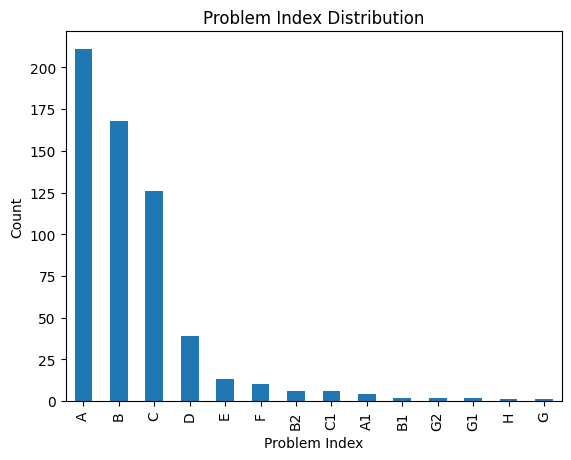

In [25]:
# Count plot for Problem Index 
df_1['Problem Index'].value_counts().plot(kind='bar')
plt.title('Problem Index Distribution')
plt.xlabel('Problem Index')
plt.ylabel('Count')
plt.show()

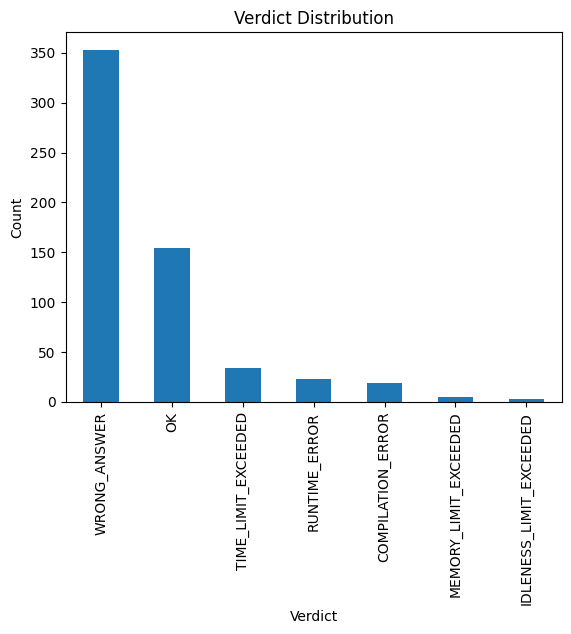

In [26]:
# Count plot for Problem Index 
df_1['Verdict'].value_counts().plot(kind='bar')
plt.title('Verdict Distribution')
plt.xlabel('Verdict')
plt.ylabel('Count')
plt.show()

In [27]:
# Group by Problem Index and Verdict, then count occurrences
index_verdict_counts = df_1.groupby(['Problem Index', 'Verdict']).count()

# Display the grouped DataFrame
index_verdict_counts


Problem Tags  Programming Language  \
Problem Index Verdict                                                       
A             COMPILATION_ERROR                   9                     9   
              MEMORY_LIMIT_EXCEEDED               3                     3   
              OK                                 74                    74   
              RUNTIME_ERROR                      12                    12   
              TIME_LIMIT_EXCEEDED                 4                     4   
              WRONG_ANSWER                      108                   109   
A1            OK                                  1                     1   
              WRONG_ANSWER                        3                     3   
B             COMPILATION_ERROR                   4                     4   
              MEMORY_LIMIT_EXCEEDED               1                     1   
              OK                                 44                    44   
              RUNTIME_ERROR                       8                     8   
              TIME_LIMIT_EXCEEDED                 6                     6   
              WRONG_ANSWER                      105                   105   
B1            OK                                  1                     1   
              WRONG_ANSWER                        1                     1   
B2            OK                                  1                     1   
              TIME_LIMIT_EXCEEDED                 1                     1   
              WRONG_ANSWER                        4                     4   
C             COMPILATION_ERROR                   6                     6   
              IDLENESS_LIMIT_EXCEEDED             3                     3   
              MEMORY_LIMIT_EXCEEDED               1                     1   
              OK                                 19                    19   
              RUNTIME_ERROR                       3                     3   
              TIME_LIMIT_EXCEEDED                16                    16   
              WRONG_ANSWER                       78                    78   
C1            OK                                  1                     1   
              WRONG_ANSWER                        5                     5   
D             OK                                  8                     8   
              TIME_LIMIT_EXCEEDED                 3                     3   
              WRONG_ANSWER                       28                    28   
E             OK                                  2                     2   
              TIME_LIMIT_EXCEEDED                 1                     1   
              WRONG_ANSWER                       10                    10   
F             TIME_LIMIT_EXCEEDED                 2                     2   
              WRONG_ANSWER                        8                     8   
G             OK                                  0                     1   
G1            OK                                  1                     1   
              WRONG_ANSWER                        1                     1   
G2            OK                                  1                     1   
              WRONG_ANSWER                        1                     1   
H             TIME_LIMIT_EXCEEDED                 1                     1   

                                       Time Consumed (ms)  \
Problem Index Verdict                                       
A             COMPILATION_ERROR                         9   
              MEMORY_LIMIT_EXCEEDED                     3   
              OK                                       74   
              RUNTIME_ERROR                            12   
              TIME_LIMIT_EXCEEDED                       4   
              WRONG_ANSWER                            109   
A1            OK                                        1   
              WRONG_ANSWER                              3   
B             COMPILATION_ERROR         

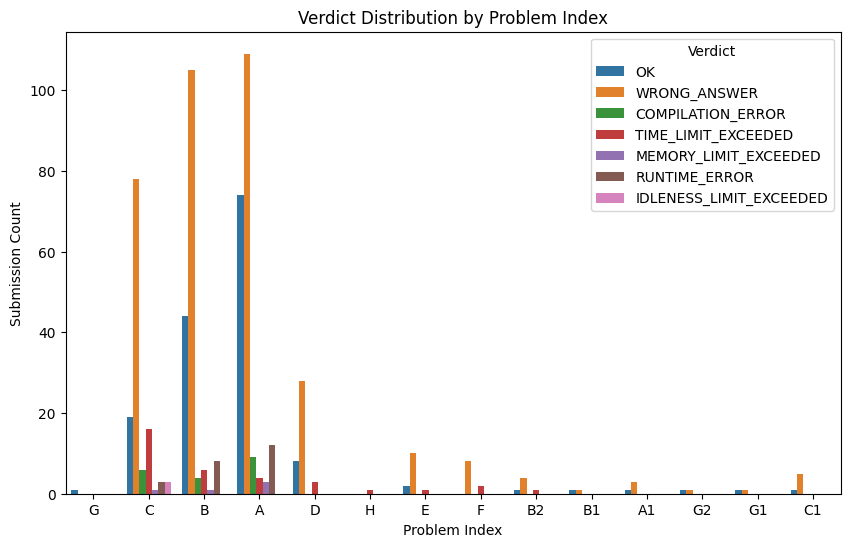

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Problem Index', hue='Verdict', data=df_1)
plt.title('Verdict Distribution by Problem Index')
plt.xlabel('Problem Index')
plt.ylabel('Submission Count')
plt.legend(title='Verdict')
plt.show()

### Hypothesis Testing

- **Null Hypothesis (H₀):** There is no relationship between Problem Index and Verdict.

- **Alternative Hypothesis (H₁):** There is a relationship between Problem Index and Verdict. 


### Chi-Squared Test Results

- **P-Value:** 0.6823

Since the p-value (0.0816) is greater than the significance level (0.05), we reject the null hypothesis (H₀). This means that there is a significant relationship between **Problem Index** and **Verdict**.



Chi-Squared Test P-Value: 0.1715
There is a significant relationship between Problem Index and Verdict.


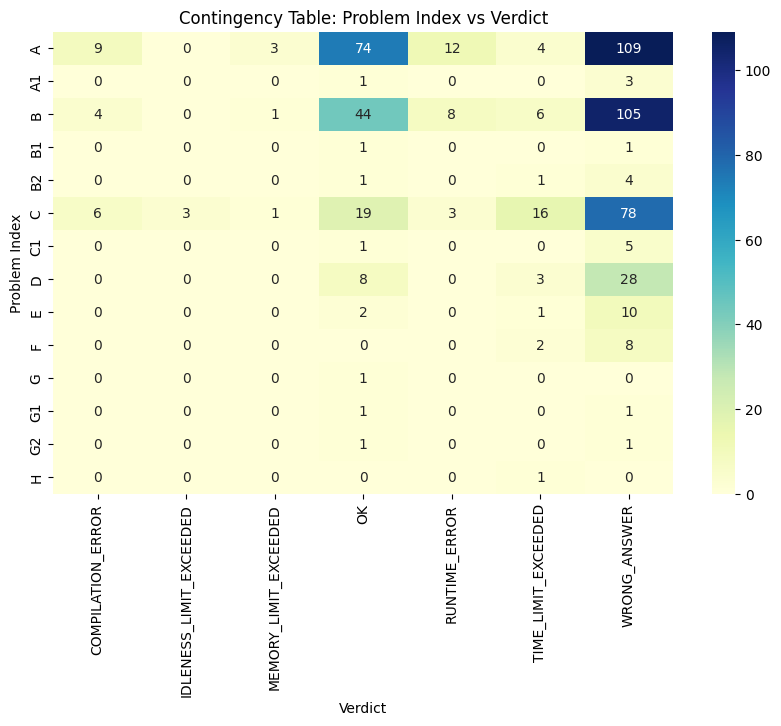

In [30]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Assuming df_1 is your DataFrame with 'Problem Index' and 'Verdict'
# Let's create a contingency table (cross-tabulation) for Problem Index and Verdict
contingency_table = pd.crosstab(df_1['Problem Index'], df_1['Verdict'])

# Perform Chi-Squared Test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the p-value from Chi-Squared Test
print(f"Chi-Squared Test P-Value: {p_value:.4f}")

# If the p-value is less than 0.05, we reject the null hypothesis and conclude there is a relationship
if p_value > 0.05:
    print("There is a significant relationship between Problem Index and Verdict.")
else:
    print("There is no significant relationship between Problem Index and Verdict.")

# Visualizing the contingency table using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu", fmt="d")
plt.title('Contingency Table: Problem Index vs Verdict')
plt.xlabel('Verdict')
plt.ylabel('Problem Index')
plt.show()

### Hypothesis Testing

- **Null Hypothesis (H₀):** The distribution of verdicts (OK, WRONG_ANSWER, etc.) is independent of the problem tags (greedy, graphs, math, etc.).

- **Alternative Hypothesis (H₁):** The distribution of verdicts is dependent on the problem tags.

Since **p-value** is 0.0000, which is much less than the significance level of 0.05, you fail to reject the null hypothesis (H₀). 

This suggests that there is no **significant relationship** between **Problem Tags** and **Verdict**.


In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency



# Handle cases where 'Problem Tags' contains a list or a string of tags
if df_1["Problem Tags"].apply(lambda x: isinstance(x, list)).all():
        # If 'Problem Tags' contains lists of tags
        df_1["problem_tags"] = df_1["Problem Tags"]
else:
        # If 'Problem Tags' contains comma-separated strings of tags
        df_1["problem_tags"] = df_1["Problem Tags"].apply(lambda x: x.split(",") if isinstance(x, str) else [])

    

In [32]:
df_1

,Problem Index,Problem Tags,Programming Language,Verdict,Time Consumed (ms),Memory Consumed (bytes),problem_tags
2,G,NaN,"C++23 (GCC 14-64, msys2)",OK,5467,7680000,[]
3,C,"graphs, shortest paths","C++23 (GCC 14-64, msys2)",OK,108,4608000,"[graphs, shortest paths]"
4,B,"greedy, two pointers","C++23 (GCC 14-64, msys2)",OK,78,102400,"[greedy, two pointers]"
5,B,"greedy, two pointers","C++23 (GCC 14-64, msys2)",WRONG_ANSWER,30,0,"[greedy, two pointers]"
6,A,"games, greedy, implementation","C++23 (GCC 14-64, msys2)",OK,77,102400,"[games, greedy, implementation]"
...,...,...,...,...,...,...,...
588,A,"greedy, implementation",C++20 (GCC 11-64),WRONG_ANSWER,0,0,"[greedy, implementation]"
589,A,math,C++20 (GCC 11-64),OK,62,0,[math]
590,A,implementation,C++20 (GCC 11-64),WRONG_ANSWER,0,0,[implementation]
591,A,math,C++20 (GCC 11-64),OK,15,0,[math]


In [33]:
# Explode the 'problem_tags' column to create separate rows for each tag
exploded_tags = df_1.explode("problem_tags")
exploded_tags

,Problem Index,Problem Tags,Programming Language,Verdict,Time Consumed (ms),Memory Consumed (bytes),problem_tags
2,G,NaN,"C++23 (GCC 14-64, msys2)",OK,5467,7680000,NaN
3,C,"graphs, shortest paths","C++23 (GCC 14-64, msys2)",OK,108,4608000,graphs
3,C,"graphs, shortest paths","C++23 (GCC 14-64, msys2)",OK,108,4608000,shortest paths
4,B,"greedy, two pointers","C++23 (GCC 14-64, msys2)",OK,78,102400,greedy
4,B,"greedy, two pointers","C++23 (GCC 14-64, msys2)",OK,78,102400,two pointers
...,...,...,...,...,...,...,...
589,A,math,C++20 (GCC 11-64),OK,62,0,math
590,A,implementation,C++20 (GCC 11-64),WRONG_ANSWER,0,0,implementation
591,A,math,C++20 (GCC 11-64),OK,15,0,math
592,A,"brute force, math",C++20 (GCC 11-64),OK,30,0,brute force


In [34]:
# Group by 'problem_tags' and 'Verdict', then count occurrences
tag_verdict_counts = exploded_tags.groupby(["problem_tags", "Verdict"]).size().reset_index(name="count")
tag_verdict_counts

,problem_tags,Verdict,count
0,bitmasks,OK,1
1,bitmasks,RUNTIME_ERROR,3
2,bitmasks,TIME_LIMIT_EXCEEDED,2
3,brute force,COMPILATION_ERROR,3
4,brute force,IDLENESS_LIMIT_EXCEEDED,3
...,...,...,...
151,sortings,OK,2
152,sortings,WRONG_ANSWER,2
153,strings,OK,2
154,two pointers,OK,1


In [35]:
# Create a pivot table for the chi-square test
pivot_table = tag_verdict_counts.pivot(
        index="problem_tags", columns="Verdict", values="count"
    ).fillna(0)
pivot_table

Verdict,COMPILATION_ERROR,IDLENESS_LIMIT_EXCEEDED,MEMORY_LIMIT_EXCEEDED,OK,RUNTIME_ERROR,TIME_LIMIT_EXCEEDED,WRONG_ANSWER
problem_tags,,,,,,,
bitmasks,0.0,0.0,0.0,1.0,3.0,2.0,0.0
brute force,3.0,3.0,1.0,6.0,4.0,5.0,29.0
chinese remainder theorem,0.0,0.0,0.0,1.0,0.0,0.0,0.0
combinatorics,0.0,0.0,0.0,1.0,0.0,1.0,1.0
constructive algorithms,0.0,0.0,0.0,10.0,0.0,1.0,26.0
data structures,0.0,0.0,0.0,3.0,0.0,2.0,6.0
dfs and similar,0.0,3.0,0.0,3.0,0.0,0.0,4.0
divide and conquer,0.0,3.0,0.0,0.0,0.0,2.0,2.0
dp,0.0,0.0,1.0,2.0,2.0,1.0,2.0


In [36]:
# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(pivot_table)

# Print the p-value
print(f"Chi-Square Test P-Value: {p:.4f}")

Chi-Square Test P-Value: 0.0000


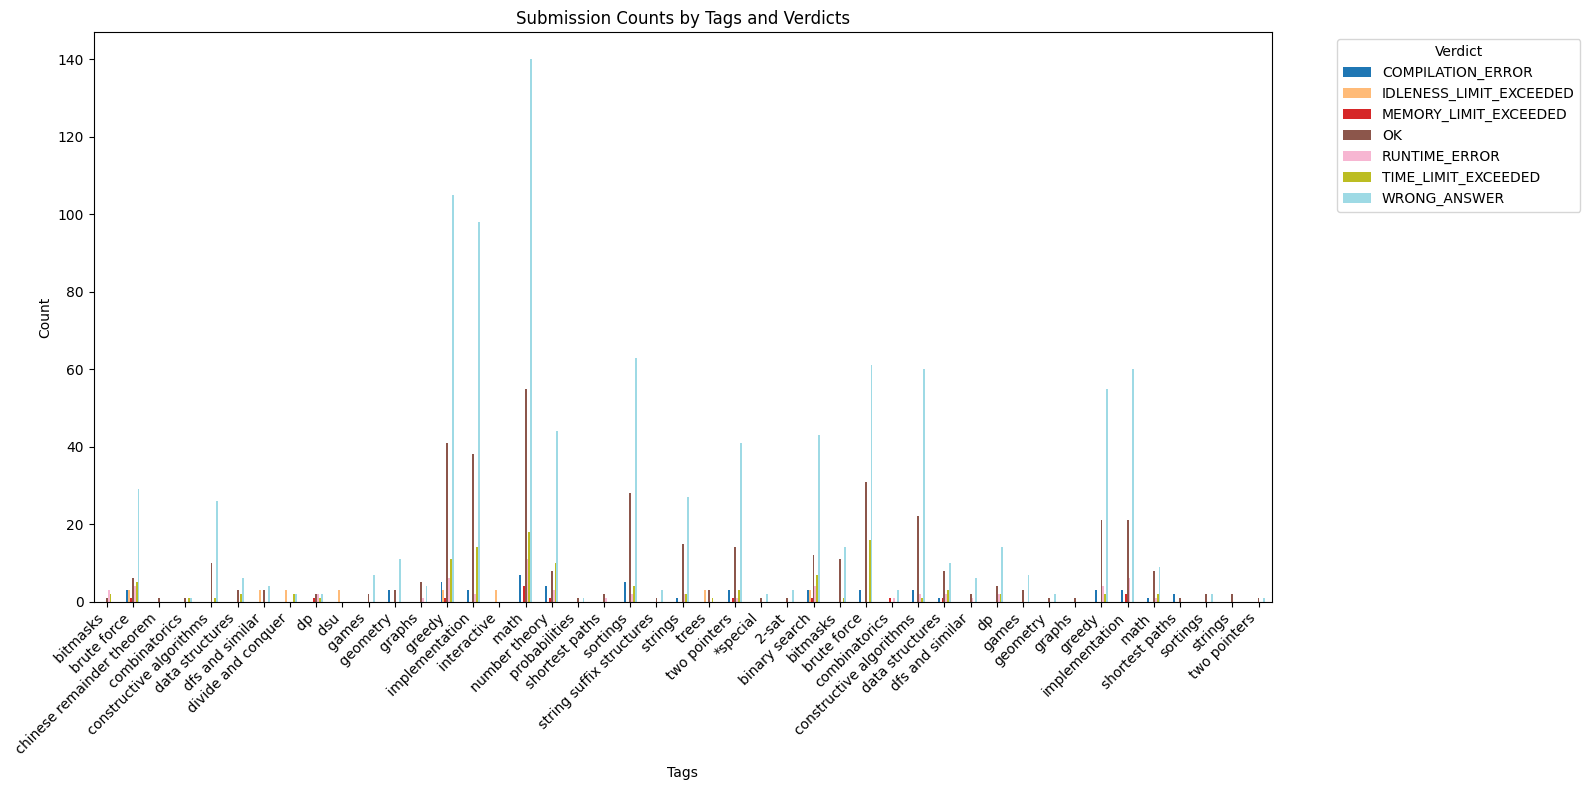

In [37]:
# Plot grouped bar chart for counts by verdict and tags
pivot_table.plot(kind="bar", figsize=(16, 8), colormap="tab20")
plt.title("Submission Counts by Tags and Verdicts")
plt.xlabel("Tags")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Verdict", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

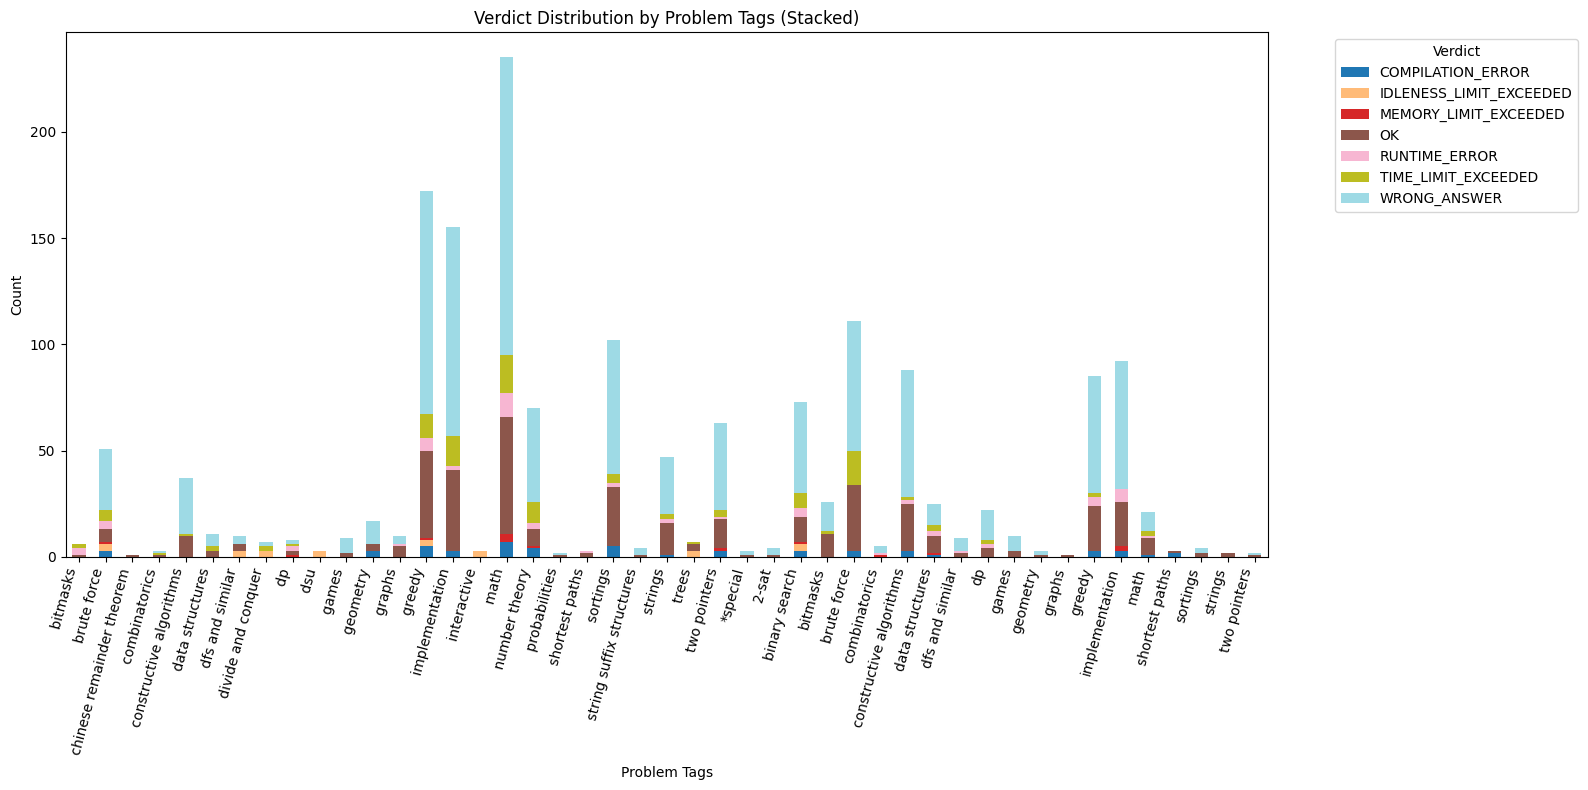

In [38]:
# Plot a stacked bar chart of verdicts by problem tags
pivot_table.plot(kind="bar", stacked=True, figsize=(16, 8), colormap="tab20")
plt.title("Verdict Distribution by Problem Tags (Stacked)")
plt.xlabel("Problem Tags")
plt.ylabel("Count")
plt.xticks(rotation=75, ha="right")
plt.legend(title="Verdict", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## Summary

1. There is a **significant relationship** between **Problem Index** and **Verdict**:
   - The problem index, often linked to problem difficulty, directly impacts the submission's outcome.

2. There is **no significant relationship** between **Problem Tags** and **Verdict**:
   - Problem tags are not strongly associated with the outcome of a submission.

3. **Implication**:
   - A user's ability to solve a problem is more likely influenced by their understanding of the problem to save both time and effort.


### Advice

- Focus on thoroughly understanding the problem and its requirements, as this has a greater impact on your ability to solve it than the tags themselves.  
- While tags may not directly influence the outcome, they provide useful context. Invest time in mastering the concepts associated with common tags, as this will enhance your efficiency and problem-solving skills.  
- Building a strong foundation in tagged topics will help you approach problems with greater confidence, saving both time and effort during practice or competition.  
